# Part 5:
## QSAR Model Building

In [14]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Calculated fingerprints from the previous notebook
dataset = pd.read_csv('data/bioactivity_data_class_pEC50_pubchem_fp.csv')
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pEC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.397940
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.154902
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.698970
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.657577
262,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.508638
263,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.585027
264,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.376751


In [3]:
X = dataset.drop(['pEC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
262,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
263,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
264,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = dataset.iloc[:,-1]
y

0      6.397940
1      7.154902
2      5.000000
3      6.698970
4      7.698970
         ...   
261    7.657577
262    7.508638
263    7.585027
264    7.376751
265    7.337242
Name: pEC50, Length: 266, dtype: float64

In [6]:
# TODO: Remove low varience feature 
# * Removing the redundant features will allow me to build the ML model faster
def remove_low_var(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_var(X, threshold=0.1)
X

,PubchemFP2,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP33,PubchemFP37,...,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP826
0,0,1,1,1,1,0,0,0,1,1,...,0,1,0,0,1,1,1,0,1,1
1,0,1,1,1,1,0,0,0,1,0,...,0,1,0,0,1,1,1,0,1,1
2,1,1,1,1,1,0,0,0,1,0,...,0,1,0,0,1,1,1,0,1,1
3,1,1,1,1,1,0,0,0,1,0,...,0,1,0,0,1,1,1,0,1,1
4,0,1,1,1,1,1,0,0,1,0,...,0,1,0,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,1,1,1,1,0,0,0,0,1,0,...,0,0,1,1,0,1,1,0,1,0
262,1,1,1,1,0,0,0,0,1,0,...,0,0,1,1,0,1,1,0,1,0
263,1,1,1,1,1,0,0,0,0,0,...,0,0,1,1,0,1,1,0,1,0
264,1,1,1,1,0,0,0,0,1,0,...,0,0,1,1,0,1,1,0,1,0


In [7]:
# TODO: Save result to a csv file
X.to_csv('descriptor_list.csv', index=False)

### Random Forest Regression Model

In [9]:
model = RandomForestRegressor(n_estimators=400, random_state=42)
model.fit(X, y)

r2 = model.score(X, y)
r2

0.7512911085236886

In [10]:
# TODO: Model Prediction 
# Here i will apply the trained model to make a prediction on the X variable.
y_pred = model.predict(X)
y_pred

array([6.32871726, 6.36955321, 5.56063466, 6.46797181, 7.33853654,
       5.28884437, 6.5299501 , 6.74335647, 6.30052695, 5.8773734 ,
       6.46797181, 6.66085342, 6.36955321, 6.64341101, 6.18932731,
       6.4627249 , 6.74496588, 6.70357449, 7.11024022, 5.43517136,
       6.36955321, 6.07301704, 6.42002795, 7.08316458, 5.12878896,
       6.37902175, 6.76467528, 6.87489151, 6.2385639 , 5.61304204,
       6.32353054, 6.13300364, 6.405422  , 6.1537382 , 6.61564173,
       7.07921958, 6.64099545, 6.86057181, 6.68749291, 6.405422  ,
       6.33687525, 6.5356479 , 6.405422  , 6.61564173, 6.64099545,
       5.62171468, 5.48621567, 6.64099545, 6.5356479 , 6.37545348,
       6.405422  , 7.2972085 , 6.77662986, 6.61564173, 6.29332243,
       6.37545348, 6.405422  , 6.77662986, 6.45511664, 5.55474258,
       5.12152971, 5.07005833, 6.5356479 , 6.27425559, 6.34451115,
       6.29332243, 6.27293857, 5.88134244, 5.17946638, 7.16088205,
       6.59701034, 7.48818954, 6.8654884 , 6.8654884 , 6.73708

In [11]:
# TODO: Model Performance
print('Mean squared error (MSE): %.2f' % mean_squared_error(y, y_pred))

print('Coefficient of determination (R^2): %.2f' % r2_score(y, y_pred))

Mean squared error (MSE): 0.20
Coefficient of determination (R^2): 0.75


### Data Viz (Experimental vs Predicted pEC50 for Training Data)

Text(0.5, 0, 'Experimental pEC50')

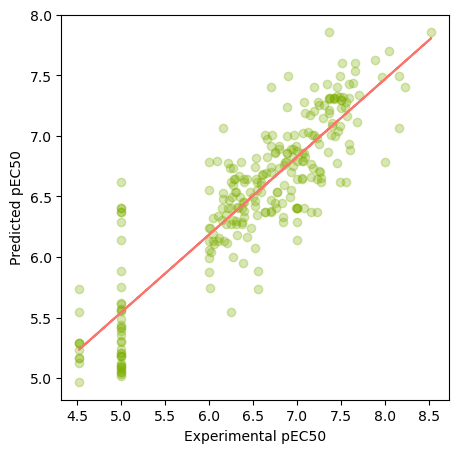

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(x=y, y=y_pred, c="#7CAE00", alpha=0.3)

# adding a trandline
# got this from stack overflow 
z = np.polyfit(y, y_pred, 1)
p = np.poly1d(z)

plt.plot(y, p(y), "#F8766D")
plt.ylabel('Predicted pEC50')
plt.xlabel('Experimental pEC50')

### Save Model as Pickle Object

In [15]:
pickle.dump(model, open('Thrombopoietin_receptor_model.pkl', 'wb'))